In [1]:
import pandas as pd
import numpy as np
import json as j
import pickle as p
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats
import sys

from nltk.tokenize import word_tokenize

from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
# https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html

from IPython.display import display_html

In [2]:
shared_path = 'C:/Users/Jonas/git/thesis/code/shared'
if shared_path not in sys.path:
    sys.path.append(shared_path)
    
from Argument import Argument
from DataHandler import DataHandler

In [3]:
data = DataHandler()
data.load_bin('results/1632239915.4824035-3756-arguments-cleaned-test-w-excerpts.pickle')

In [4]:
data.validate()

True

In [5]:
arguments = data.get_arguments()

In [6]:
arg_contexts = {k: [] for k in DataHandler.get_query_context_keys(arguments)}

In [7]:
for k in arg_contexts.keys():
    arg_contexts[k] = DataHandler.get_query_context(arguments, k)

In [8]:
records = list()
for k in arg_contexts.keys():
    a = [len(b.sentences) for b in arg_contexts[k]]
    records.append({
        'context': k,
        'len': len(arg_contexts[k]),
        'arg_lengths': a,
        'mean_arg_length':  np.mean(a),
        'std_arg_length':  np.std(a),
        'median_arg_length': np.median(a),
        'max_arg_length': np.max(a),
    })
context_sizes = pd.DataFrame.from_records(records)

In [ ]:
context_sizes.sort_values(by=['len'], ascending=True)[:20]

In [12]:
context_sizes.shape

(469, 7)

In [23]:
context_sizes\
    [\
     (context_sizes.len <= 5)\
     & (context_sizes.max_arg_length <= 20)\
    ]\
    .sort_values(by=['len'], ascending=True)

,context,len,arg_lengths,mean_arg_length,std_arg_length,median_arg_length,max_arg_length
7,transnational_governance,3,"[14, 6, 7]",9.000000,3.559026,7.0,14
426,law,3,"[9, 7, 4]",6.666667,2.054805,7.0,9
405,urbanization,3,"[3, 9, 8]",6.666667,2.624669,8.0,9
332,heart,3,"[10, 3, 4]",5.666667,3.091206,4.0,10
458,pokemon,3,"[4, 9, 13]",8.666667,3.681787,9.0,13
189,merkel,3,"[6, 4, 4]",4.666667,0.942809,4.0,6
183,radio,3,"[5, 10, 15]",10.000000,4.082483,10.0,15
157,religion,3,"[4, 4, 4]",4.000000,0.000000,4.0,4
195,star_wars,3,"[3, 14, 10]",9.000000,4.546061,10.0,14
113,elon_musk,3,"[6, 3, 8]",5.666667,2.054805,6.0,8


In [9]:
def print_arg(arg, hl=None):
    html_str = f'<p style="text-align:right">{arg.arg_id}</p><div style="border: solid black 1px; padding-left: 5px">'
    for idx, s in enumerate(arg.sentences):
        if hl is None:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if s in arg.snippet else "white"}">{s}</span><br>'
        else:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if idx in hl else "white"}">{s}</span><br>'
    display_html(html_str+ '</div>', raw=True)
    
def print_arg(arg, hl=None):
    html_str = f'<p style="text-align:right">{arg.arg_id}</p><div style="border: solid black 1px; padding-left: 5px">'
    tex_str = r"""\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{""" + arg.arg_id + r"""}}\\
        \hline""" + '\n'
    for idx, s in enumerate(arg.sentences):
        if hl is None:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if s in arg.snippet else "white"}">{s}</span><br>'
            tex_str += (r'\textcolor{gray}{'+ f'{idx+1:02d}' + r'}&'+ ('\\hl' if s in arg.snippet else '') + r'{'+ s +r'}\\' + '\n')
        else:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if idx in hl else "white"}">{s}</span><br>'
            tex_str += r'\textcolor{gray}{'+ f'{idx+1:02d}' + r'}&'+ ('\\hl' if idx in hl else '') + r'{'+ s +r'}\\' + '\n'
    display_html(html_str+ '</div>', raw=True)
    print(tex_str+'\hline\n\end{tabularx}')

In [32]:
for a in arg_contexts['law']:
    print_arg(a, a.excerpt_indices)

Sccb2cd3b-A64e0401 01 Since 1984 the law has been 21 years old to consume alcohol. 02 The age to fight? 03 Think back to World Wars and battles before, we had boys, and when I say boys I mean children as young as six or seven on the battlefield. 04 Our country is one of tradition and not much for change. 05 The drinking age was set 24 years ago and has not been touched since, we accept that for what it is, and it is mainly young adults and teens in high school who argue with it. 06 The age now to fight for our country is 18, only three years younger than the drinking age. 07 It’s not that long to wait in reality. 08 And most people are generally proud to go fight for their country, if they sign up it is because it’s something they want to do. 09 Though drafts have been instated before, it has been several years, so those willing to sign up for the military know what they are getting themselves into.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{Sccb2cd3b-A64e0401}}\\
        \hline
\textcolor{gray}{01}&{Since 1984 the law has been 21 years old to consume alcohol.}\\
\textcolor{gray}{02}&{The age to fight?}\\
\textcolor{gray}{03}&{Think back to World Wars and battles before, we had boys, and when I say boys I mean children as young as six or seven on the battlefield.}\\
\textcolor{gray}{04}&{Our country is one of tradition and not much for change.}\\
\textcolor{gray}{05}&\hl{The drinking age was set 24 years ago and has not been touched since, we accept that for what it is, and it is mainly young adults and teens in high school who argue with it.}\\
\textcolor{gray}{06}&{The age now to fight for our country is 18, only three years younger than the drinking age.}\\
\textcolor{gray}{07}&{It’s not that long to wait in reality.}\\
\textcolor{gray}{08}&{And most people are generally proud to go fight for their country, if they sign up it is because it

S838c9eec-Aa9606e58 01 Which set of moral laws are you referring to? 02 For example, Christians would point to the Bible for their moral laws. 03 I believe there are no moral absolutes. 04 I also believe society has improved over time. 05 For example, there is now an international police force, NATO, whose goal is to limit the violence of wars and protect human rights. 06 A better analogy is if a person is attacked and fatally shoots their aggressor and your moral law says killing is wrong. 07 Was the moral law not broken?

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{S838c9eec-Aa9606e58}}\\
        \hline
\textcolor{gray}{01}&\hl{Which set of moral laws are you referring to?}\\
\textcolor{gray}{02}&{For example, Christians would point to the Bible for their moral laws.}\\
\textcolor{gray}{03}&{I believe there are no moral absolutes.}\\
\textcolor{gray}{04}&{I also believe society has improved over time.}\\
\textcolor{gray}{05}&{For example, there is now an international police force, NATO, whose goal is to limit the violence of wars and protect human rights.}\\
\textcolor{gray}{06}&{A better analogy is if a person is attacked and fatally shoots their aggressor and your moral law says killing is wrong.}\\
\textcolor{gray}{07}&\hl{Was the moral law not broken?}\\
\hline
\end{tabularx}


Sc66f7c55-A331e55ef 01 Jessica's law forces every single person charged with brutal child molestation into one of two categories. 02 Mandatory minimum of 25 years in prison, or innocent. 03 The reality is that most of these people probably deserve something in the way of 7-15 years depending on all the factors, which is what they were getting prior to Jessica's Law. 04 There will always be a few people who get off lighter then they diserve no matter what the crime is, but mandatory minimums will actually make the problem worse.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{Sc66f7c55-A331e55ef}}\\
        \hline
\textcolor{gray}{01}&{Jessica's law forces every single person charged with brutal child molestation into one of two categories.}\\
\textcolor{gray}{02}&{Mandatory minimum of 25 years in prison, or innocent.}\\
\textcolor{gray}{03}&\hl{The reality is that most of these people probably deserve something in the way of 7-15 years depending on all the factors, which is what they were getting prior to Jessica's Law.}\\
\textcolor{gray}{04}&\hl{There will always be a few people who get off lighter then they diserve no matter what the crime is, but mandatory minimums will actually make the problem worse.}\\
\hline
\end{tabularx}


In [33]:
for a in arg_contexts['star_wars']:#['religion']:
    print_arg(a, a.excerpt_indices)

S4dd1e93f-Af1374301 01 I'm here to debate is star wars a remake of star trek! 02 My opinion is that yes star wars is basically a remake of star trek. 03 One of the reasons is that star trek was made first then star wars came out its basically just a better-animated action packed movie.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{S4dd1e93f-Af1374301}}\\
        \hline
\textcolor{gray}{01}&\hl{I'm here to debate is star wars a remake of star trek!}\\
\textcolor{gray}{02}&\hl{My opinion is that yes star wars is basically a remake of star trek.}\\
\textcolor{gray}{03}&{One of the reasons is that star trek was made first then star wars came out its basically just a better-animated action packed movie.}\\
\hline
\end{tabularx}


S7851b886-Aa35939db 01 I think Star Trek is much better overall. 02 The message of Star Trek is stronger than Star Wars. 03 With ST, you have episodes dealing with racism , AIDS , philosophy of mind and rights , euthanasia and much more. 04 Star Wars paints a black and white picture of morality, whereas Star Trek often reveals shades of grey . 05 Having a TV record allows them to have a variety of stories. 06 This is like the problem above, Star Wars is all about the Sith/Force/Jedi. 07 It is one clear and common good v. evil trope [10]. 08 Star Trek is about exploration, the TV format allows them to have a variety of enemies, problems, and characters. 09 The TV format also allows for deeper character development. 10 Effects wise, maybe Star Wars does beat early Star Trek when comparing it to older films. 11 Although, those movies aren't suppose to have big space wars like Star Wars does. 12 With Star Wars, there's doubt that the prequels were originally conceived. 13 There seems to be a lot of mistakes in the retconning, which create plot holes [12]. 14 I conclude that Star Trek is philosophically superior, has a better amount of stories, better character development, and less problems with its retconning.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{S7851b886-Aa35939db}}\\
        \hline
\textcolor{gray}{01}&{I think Star Trek is much better overall.}\\
\textcolor{gray}{02}&{The message of Star Trek is stronger than Star Wars.}\\
\textcolor{gray}{03}&\hl{With ST, you have episodes dealing with racism , AIDS , philosophy of mind and rights , euthanasia and much more.}\\
\textcolor{gray}{04}&{Star Wars paints a black and white picture of morality, whereas Star Trek often reveals shades of grey .}\\
\textcolor{gray}{05}&{Having a TV record allows them to have a variety of stories.}\\
\textcolor{gray}{06}&{This is like the problem above, Star Wars is all about the Sith/Force/Jedi.}\\
\textcolor{gray}{07}&\hl{It is one clear and common good v. evil trope [10].}\\
\textcolor{gray}{08}&{Star Trek is about exploration, the TV format allows them to have a variety of enemies, problems, and characters.}\\
\textcolor{gray}{09}&{The TV format also allows for deep

S14bc8da3-A2416ee7f 01 What with Star Trek: The Original Series, The Next Generation, Voyager, Deep Space 9, Enterprise, and soon-to-be-12 movies, the total run time of all canon Star Trek material is over 22 days. 02 Star Wars has three moviessix, if you count the prequels. 03 The total run time of all six movies is less than 14 hours. 04 Though both franchises also boast a healthy extended universe in the form of novels, comics, and games, Star Trek handily beats Star Wars in screen time by more than 21 days. 05 Let me rephrase that. 06 Star Trek has over 37 times the material available for your viewing pleasure than Star Wars does. 07 That is pretty much unbeatable. 08 The Star Trek franchise has the wonderful ability to both summon tremendous nostalgia and still produce sexy new stuff. 09 To compare with Star Wars, the original Star Trek series debuted in 1966, and A New Hope came eleven years later in 1977. 10 The Revenge of the Sith came out in 2006 and has a respectable 80% on Rotten Tomatoes, but in 2009 Star Trek starring Chris Pine and Zachary Quinto was released, and that holds an impressive Rotten-Tomatoes 95%.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{S14bc8da3-A2416ee7f}}\\
        \hline
\textcolor{gray}{01}&\hl{What with Star Trek: The Original Series, The Next Generation, Voyager, Deep Space 9, Enterprise, and soon-to-be-12 movies, the total run time of all canon Star Trek material is over 22 days.}\\
\textcolor{gray}{02}&{Star Wars has three moviessix, if you count the prequels.}\\
\textcolor{gray}{03}&{The total run time of all six movies is less than 14 hours.}\\
\textcolor{gray}{04}&{Though both franchises also boast a healthy extended universe in the form of novels, comics, and games, Star Trek handily beats Star Wars in screen time by more than 21 days.}\\
\textcolor{gray}{05}&{Let me rephrase that.}\\
\textcolor{gray}{06}&{Star Trek has over 37 times the material available for your viewing pleasure than Star Wars does.}\\
\textcolor{gray}{07}&\hl{That is pretty much unbeatable.}\\
\textcolor{gray}{08}&{The Star Trek franchise has the wonderf

In [86]:
possible_contexts_for_human_annotation_study = {
    'merkel', #3, 4.7
    'religion', #3, 4.
    'transnational_governance', # 3, 9.
    'aliens', # 10, 6.1
    'covid_vaccination_should_be_mandatory', # 6, 4.5
    'russia_is_bad', # 4, 6.75
    'trade_network', # 4, 5.5
    'forests', # 6, 5.3, maybe select only a few of the arguments
    'leaving_school_early', # 6, 5.2 - bad example, not diverse
    'urbanization', # 3, 6.7
    'star_wars', #3, 9.
    'is_golf_a_sport', # 4, 7.25
    'league_of_legends', # 6, 3.5
    'veganism_is_healthy',# 3, 17.3
    'public_transport', # 4, 23.35
    'free_knowledge', 
    'covid_vaccination', 
    
    #'does_germany_produce_green_energy', #6, 9.2
    #'radio', # 3, 10.
    #'law', #3, 6.7
}
len(possible_contexts_for_human_annotation_study)

15

In [12]:
for a in arguments:
    if a.arg_id in ['S49d644cb-A26a78655', 'Sdc20d85-A5589f58']:
        print_arg(a, hl=a.excerpt_indices)

Sdc20d85-A5589f58 01 I do believe that there will be some significance to this bill, however the trust the people of India had with the Government of India has truly dissipated overtime. 02 After many grueling events like that of the Coal Ministry ,where even our PM Manmohan Singh indicated that corruption in India is evident and it has always been there : 03 It will be hard for the people to even believe that action will be taken, on the corrupt officers and politicians that control most India's local economic trade. 04 Not always will they be caught or even forwarded to the tops of the Corruption agencies in India. 05 When you said : transparency and this will build faith of people on its government. 06 By that time and perhaps the past , corruption was evident and known throughout the Indian government, even by our PM , who was rather upset that it was there and that the exposure that lost the governments credibility. 07 It doesn't take a whole group to credibility but rather only one person to ruin the name of India. 08 India was built on the sweat, blood and connections / power/ handwork. 09 Yet along with these advancements arose Corruption. 10 It is now part of the foundations of which India has built its emerging superpower upon. 11 And for India to eradicate this problem , not only will it be hard, but it will also change the way Indian do business, rock it and put into jeopardy the work that has been done to make it so successful.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{Sdc20d85-A5589f58}}\\
        \hline
\textcolor{gray}{01}&\hl{I do believe that there will be some significance to this bill, however the trust the people of India had with the Government of India has truly dissipated overtime.}\\
\textcolor{gray}{02}&\hl{After many grueling events like that of the Coal Ministry ,where even our PM Manmohan Singh indicated that corruption in India is evident and it has always been there :}\\
\textcolor{gray}{03}&{It will be hard for the people to even believe that action will be taken, on the corrupt officers and politicians that control most India's local economic trade.}\\
\textcolor{gray}{04}&{Not always will they be caught or even forwarded to the tops of the Corruption agencies in India.}\\
\textcolor{gray}{05}&{When you said : transparency and this will build faith of people on its government.}\\
\textcolor{gray}{06}&{By that time and perhaps the past , corruption wa

S49d644cb-A26a78655 01 It's common sense that faith is an immaterial reality. 02 You can't weigh or measure the chemistry of faith. 03 I stood on the premise of faith being an immaterial reality and is universal regardless of your worldview. 04 You have already acknowledged that faith is universal. 05 I don't see how it's winning in your favor. 06 Don't give your hopes up. 07 The burden of proof is for you to disprove me and demonstrate that faith is not immaterial and/or not universal. 08 Faith is an abstract object like the laws of logic or philosophical propositions. 09 Faith seems to exists as properties of persons, Not as mere abstractions. 10 Since the abstract object faith is not itself faithful (just as quickness is not quick or laziness not lazy), It would seem to follow that in the absence of any people faith does not exist. 11 Which seems to contradict the hypothesis. 12 You can't leave them floating in the unintelligible way. 13 The nature of faith seems to be grounded in a divine Creator and Lawgiver. 14 Because faith is independent of human conventions just like the laws of logic. 15 Humans just use words to describe it in order to verbally communicate it or create contingent things that represent their idea of faith. 16 Now about faith in religion. 17 Faith in the Bible means to simply trust. 18 This stuff is not complicated. 19 Saying faith is universal is not unfair. 20 By definition if you have trust in anything then by definition you have faith in it. 21 It's not tough. 22 You can object to the term. 23 You can use a different term to describe it. 24 By definition that is what faith is or means. 25 Abstract objects (which are immaterial) although can be EXPRESSED in material, Are independent of human conventions. 26 For example the laws of logic are independent of human minds. 27 Before there were any humans on the earth, Is the statement, there are no humans on the earth true? 28 I'm going to say it another way. 29 Faith is much like the laws of logic. 30 Abstract objects and immaterial and independent of human conventions. 31 Logic isn't a thing and neither is faith. 32 It isn't created by anybody. 33 Logic is a word that refers to the inescapable rules of existence. 34 These rules are not contingent. 35 They apply to everything that exists. 36 For anything that exists, Exists, And it is false to claim that it does not exist. 37 Everything that exists, Exists; and it doesn't non exist because if it didn't exist it wouldn't exist in the first place. 38 Faith and logic isn't just true in this universe or true in a material sense it's true literally every case of existence. 39 In any possible universe. 40 Logic and faith is not in the universe. 41 The universe does not contain logic or faith. 42 Logic/faith and existence are not able to be separated from one another. 43 But nobody is forcing the laws of logic or faith down your throat. 44 There's no cosmic force doing that. 45 Laws of logic (like faith) are necessary and couldn't be any other way. 46 Logic or faith is NOT an entity that you can point out. 47 It's woven into the fabric of everything that exists. 48 You could say that it's a necessary part of any existent thing. 49 The laws of logic applies to all existent things. 50 Much like faith.

\noindent\begin{tabularx}{\textwidth}{|rX|}
		\multicolumn{2}{r}{\textcolor{gray}{S49d644cb-A26a78655}}\\
        \hline
\textcolor{gray}{01}&{It's common sense that faith is an immaterial reality.}\\
\textcolor{gray}{02}&{You can't weigh or measure the chemistry of faith.}\\
\textcolor{gray}{03}&{I stood on the premise of faith being an immaterial reality and is universal regardless of your worldview.}\\
\textcolor{gray}{04}&{You have already acknowledged that faith is universal.}\\
\textcolor{gray}{05}&{I don't see how it's winning in your favor.}\\
\textcolor{gray}{06}&{Don't give your hopes up.}\\
\textcolor{gray}{07}&{The burden of proof is for you to disprove me and demonstrate that faith is not immaterial and/or not universal.}\\
\textcolor{gray}{08}&{Faith is an abstract object like the laws of logic or philosophical propositions.}\\
\textcolor{gray}{09}&{Faith seems to exists as properties of persons, Not as mere abstractions.}\\
\textcolor{gray}{10}&{Since the abstract object

__Observations__
* Even though sources/citations are important, they are likely to be snippets. 
    * [(Sb579644e-A6e00f137, 'transnational_governance'), ('S51d0a818-Aa4696306', 'radio'), ('Seb991d36-A9c551936', 'educational_costs'), ]
* Some arguments suffer from definitions for their debates, and thus, they are not helpful in any way. 
    * [('Sde25d56-Ad969d36', 'league_of_legends),('Scd5f8176-A6735859a', ), ('S6abdbffe-A55b0fc1c', 'should_hydraulic_fracturing_be_used'), ('S6abdbffe-Afd4941b','should_hydraulic_fracturing_be_used')]
* Arguments often show characteristics of its round-based origin (debates) where the opponent is addressed, but since the original context is not here, arguments are difficult to understand. General problem of argument search engine's data.
    * S63f15303-A2de94d75, ('Sce447b24-Aec66db96', 'veganism_is_healthy')
* Two sentences might be to short for an argument with 70–80 sentences.
    * 'nuclear_energy_should_be_banned', 'S49d644cb-A26a78655'

__Arising questions__
* Are long sentence more likely to be snippet sentences (e.g. context transnational_governance)? Maybe only in short arguments, see nuclear_energy_should_be_banned.

In [10]:
records = list()
for argument in arguments:
    tokenss = [len(word_tokenize(s)) for s in argument.sentences]
    snippet_len = sum(np.take(tokenss, argument.excerpt_indices))
    total_len = sum(tokenss)
    records.append({
        'id': argument.arg_id,
        'snippet_len': snippet_len,
        'total_len': total_len
    })
    
lengths = pd.DataFrame.from_records(records)

In [11]:
lengths['ratio'] = lengths.apply(lambda r: r.snippet_len/r.total_len, axis=1)

lengths.sort_values(by=['total_len'], ascending=False, inplace=True)

In [50]:
len(lengths)/2

1872.0

In [12]:
top_half = lengths[:1872]# [lengths.total_len > lengths.total_len.mean()]
print(top_half.snippet_len.mean())
print(top_half.snippet_len.std())
print(top_half.snippet_len.median())
top_half

30.681623931623932
25.96550612276313
25.0


,id,snippet_len,total_len,ratio
655,Saf65bf4-Ad3dcdf26,21,2375,0.008842
1749,Saf65bf4-Ad3dcdf26,13,2375,0.005474
1341,S5ca6a540-A570bfcb0,12,2169,0.005533
972,S49b852c5-Aca2c632e,17,2065,0.008232
307,S31709ab5-Afd037052,19,2028,0.009369
...,...,...,...,...
1516,Se2925fe3-Ad7b9e813,31,274,0.113139
2957,S93e5aabc-Ae217e8a2,29,273,0.106227
538,Sdc20d85-A5589f58,62,273,0.227106
1555,S8cffdcea-Ac3559fe0,18,273,0.065934


In [13]:
shapiro_test = stats.shapiro(top_half.snippet_len)
shapiro_test

ShapiroResult(statistic=0.6901222467422485, pvalue=0.0)

Since the p-value is below .05, we reject the null hypothesis and assume data is not normally distributed.

<AxesSubplot:>

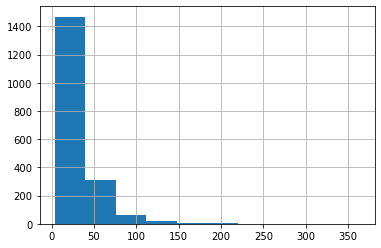

In [14]:
top_half.snippet_len.hist()

In [15]:
bottom_half = lengths[1872:]#[lengths.total_len <= lengths.total_len.mean()]
print(bottom_half.snippet_len.mean())
print(bottom_half.snippet_len.std())
print(bottom_half.snippet_len.median())
bottom_half

39.83707264957265
21.19552541897168
36.0


,id,snippet_len,total_len,ratio
2012,Scf884b6d-Acda03f28,13,272,0.047794
3042,Sa442c039-Adc0a9bed,25,272,0.091912
3710,Sa442c039-Adc0a9bed,57,272,0.209559
3392,S43726286-A6b0a804e,87,272,0.319853
1272,Sbde3cf2-A97ab918d,39,272,0.143382
...,...,...,...,...
774,S3a0c8d79-A5b6b54d2,10,18,0.555556
2822,Sd616d15d-Ad04f0fc4,12,18,0.666667
3665,S847e73c4-Ae2932a47,13,16,0.812500
1337,Sdc1cf314-Afa964db2,7,13,0.538462


In [16]:
shapiro_test = stats.shapiro(bottom_half.snippet_len)
shapiro_test

ShapiroResult(statistic=0.892426609992981, pvalue=2.8191982034816695e-34)

Since the p-value is below .05, we reject the null hypothesis and assume data is not normally distributed.

<AxesSubplot:>

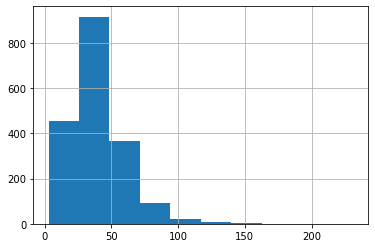

In [17]:
bottom_half.snippet_len.hist()

In [18]:
wilcoxon = stats.wilcoxon(top_half.snippet_len, bottom_half.snippet_len, alternative='two-sided')
wilcoxon

WilcoxonResult(statistic=502553.0, pvalue=4.824935364257393e-53)

In [19]:
mwu = stats.mannwhitneyu(top_half.snippet_len, bottom_half.snippet_len, alternative='two-sided')
mwu

MannwhitneyuResult(statistic=1147900.0, pvalue=1.2901763770525478e-74)

**We reject the null-hypothesis because the p-value is less than .05. Thus, we assume there is a significant difference snippet length between long and short arguments.**

In [20]:
r = pearsonr(lengths.snippet_len, lengths.total_len)
r

(-0.23421863900092157, 7.914930496730328e-48)

In [21]:
s = spearmanr(lengths.snippet_len, lengths.total_len)
s

SpearmanrResult(correlation=-0.2894676287178492, pvalue=3.498316107406892e-73)

In [22]:
t = kendalltau(lengths.snippet_len, lengths.total_len)
t

KendalltauResult(correlation=-0.18663642469206987, pvalue=1.3457167326414163e-64)

We do not find strong correlation between snippet and total length.